<a href="https://colab.research.google.com/github/Mudit-Arora/Reinforcement-Learning/blob/main/thompson_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Thompson Sampling

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

## Importing the dataset

In [ ]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [ ]:
N = len(dataset) # Total number of rows in dataset
d = len(dataset.columns) # Total number of columns
selected_ads = [] # List for ads that are selected
num_of_rewards_1 = [0] * d # Step 1: Number of rewards 1 for each ad
num_of_rewards_0 = [0] * d # Step 1: Number of rewards 0 for each ad
total_reward = 0 # Total reward

# Loop through each round
for i in range(N): # Step 2
    ad = 0
    max_rand = 0

    # Loop through each ad
    for j in range(d):
        rand_beta = random.betavariate(num_of_rewards_1[j] + 1, num_of_rewards_0[j] + 1)
        if rand_beta > max_rand: # Step 3
            max_rand = rand_beta
            ad = j

    # Update selected ad
    selected_ads.append(ad)
    reward = dataset.values[i, ad]
    if reward == 1:
        num_of_rewards_1[ad] += 1
    else:
        num_of_rewards_0[ad] += 1 # Increment num_of_rewards_0 when reward is 0
    total_reward += reward

## Visualising the results - Histogram

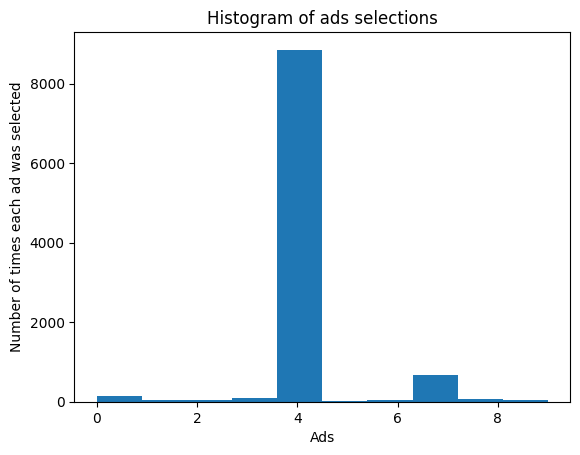

In [ ]:
plt.hist(selected_ads)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()